In [1]:
import pandas as pd

# Read in data for New York City listings
df = pd.read_csv('Resources/cleaned_airbnb_dataset2.csv', low_memory = False)
df.head(10)

,room_id,host_id,host_is_superhost,property_type,room_type,neighborhood,zipcode,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,latitude,longitude,reviews,review_scores_rating,price,cleaning_fee,total
0,958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,1,30,37.76931,-122.43386,217,97.0,170.0,100.0,270.0
1,3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,1,5,37.75402,-122.45805,160,94.0,99.0,10.0,109.0
2,5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,30,60,37.74511,-122.42102,111,98.0,235.0,100.0,335.0
3,7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,60,37.76669,-122.45250,18,86.0,65.0,50.0,115.0
4,8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,90,37.76487,-122.45183,8,93.0,65.0,50.0,115.0
5,8339,24215,f,House,Entire home/apt,Western Addition,94117,4,2.0,1.5,6,1125,37.77525,-122.43637,28,97.0,875.0,225.0,1100.0
6,8739,7149,t,Condominium,Private room,Mission,94110,3,1.0,1.0,1,14,37.75919,-122.42237,704,98.0,139.0,50.0,189.0
7,9225,29674,t,House,Private room,Potrero Hill,94107,2,1.0,1.0,1,365,37.76259,-122.40543,511,94.0,135.0,50.0,185.0
8,10251,35199,t,House,Entire home/apt,Mission,94110,4,2.0,1.0,30,60,37.75874,-122.41327,337,96.0,225.0,100.0,325.0
9,10578,37049,f,Apartment,Entire home/apt,Nob Hill,94109,2,0.0,1.0,30,180,37.79143,-122.41544,18,99.0,120.0,75.0,195.0


In [2]:
df.dtypes

room_id                   int64
host_id                   int64
host_is_superhost        object
property_type            object
room_type                object
neighborhood             object
zipcode                   int64
accommodates              int64
bedrooms                float64
bathrooms               float64
minimum_nights            int64
maximum_nights            int64
latitude                float64
longitude               float64
reviews                   int64
review_scores_rating    float64
price                   float64
cleaning_fee            float64
total                   float64
dtype: object

In [3]:
category_columns = ['property_type','room_type', 'host_is_superhost','neighborhood']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
# Assigning an integer to each category and changin
df[category_columns] = df[category_columns].fillna(0)
df[category_columns] = df[category_columns].astype(str)
enc.fit(df[category_columns])

df[category_columns] = enc.transform(df[category_columns])

In [4]:
features = ['host_is_superhost','property_type','room_type','neighborhood','accommodates','bedrooms', 'bathrooms','reviews' ]

In [5]:
# partition our training and test sets
from sklearn.model_selection import train_test_split

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Useful for plotting subplots
from matplotlib.gridspec import GridSpec as GS

# Metric for scoring the performance of each model
from sklearn.metrics import r2_score, accuracy_score

import numpy as np

In [9]:
def compare(Model, algorithm, train_data, train_labels, test_data, test_labels, k):
    # Chosing the model based on input
    if Model=='KNeighbors':
        if algorithm == 'Classifier':
            model = KNeighborsClassifier(n_neighbors=k)
        else:
            model = KNeighborsRegressor(n_neighbors=k)
    elif algorithm =='Classifier':
        model = DecisionTreeClassifier(max_depth=k)
    else:
         model = DecisionTreeRegressor(max_depth=k)
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    return predictions, test_labels, Model, algorithm, k
    

X = np.asarray(df[features])
y1 = np.asarray(df['price'])
y2 = np.asarray(df['total'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.001, random_state = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.001, random_state = 1)

col = [['KNeighbors','Classifier',X_train1,y_train1,X_test1,y_test1,5],['KNeighbors','Regressor',X_train2,y_train2,X_test2,y_test2,5],['DecisionTree','Classifier',X_train1,y_train1,X_test1,y_test1,10],['DecisionTree','Regressor',X_train2,y_train2,X_test2,y_test2,10]]

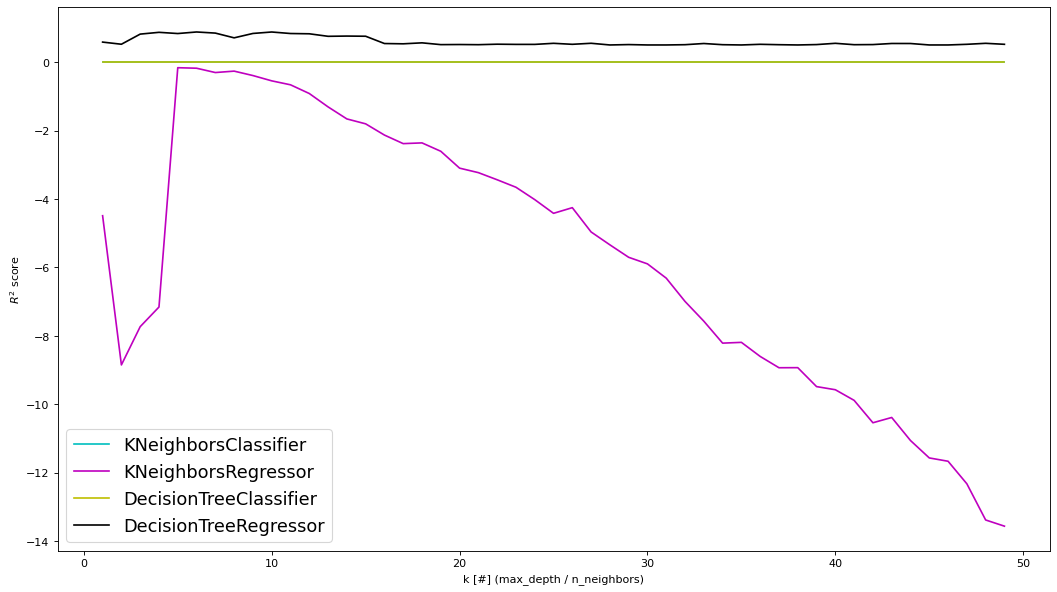

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9), dpi=80)
for i in range(4):
    score_list = []
    clist=['c','m','y','k']
    for ki in range(1,50):
        x,y,m,a,k = compare(col[i][0],col[i][1],col[i][2],col[i][3],col[i][4],col[i][5],ki)
        if a=='Classifier':
            score_list.append(accuracy_score(x,y))
        else:
            score_list.append(r2_score(x,y))
    plt.plot(list(range(1,50)),score_list, color=clist[i],label=m+a)
plt.xlabel("k [#] (max_depth / n_neighbors)")
plt.ylabel("$R^2$ score")
plt.legend(fontsize='16')
plt.show()